In [13]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display settings
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [2]:
# Load dataset
df = pd.read_csv("customer_segmentation_data.csv")

# Show first 5 rows
df.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
# Shape of dataset
df.shape
# Column names
df.columns
# Dataset info
df.info()
# Statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [4]:
# Missing values count
df.isnull().sum()


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

df.isnull().sum()


id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [6]:
# Example feature selection
features = df.select_dtypes(include=['int64', 'float64'])

features.head()


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,1,38,99342,90,3,24,113.53
1,2,21,78852,60,2,42,41.93
2,3,60,126573,30,2,28,424.36
3,4,40,47099,74,9,5,991.93
4,5,65,140621,21,3,25,347.08


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

scaled_data[:5]


array([[-1.73031962, -0.38464377,  0.31686767,  1.35846776, -0.86501013,
        -0.18234781, -1.28154045],
       [-1.72685552, -1.51536211, -0.28201608,  0.32186512, -1.2153585 ,
         1.08200524, -1.52376266],
       [-1.72339142,  1.07863878,  1.11277804, -0.71473752, -1.2153585 ,
         0.09861954, -0.23000511],
       [-1.71992731, -0.25161809, -1.21009592,  0.80561302,  1.2370801 ,
        -1.51694269,  1.69007953],
       [-1.71646321,  1.411203  ,  1.52337438, -1.02571832, -0.86501013,
        -0.11210597, -0.49144272]])

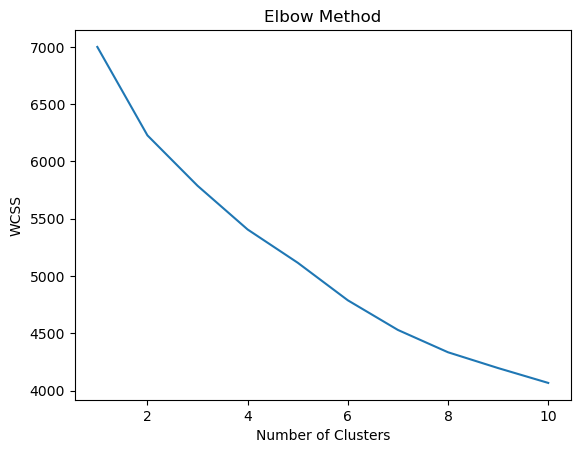

In [14]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

df.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Cluster
0,1,38,Female,99342,90,3,24,Groceries,113.53,0
1,2,21,Female,78852,60,2,42,Sports,41.93,0
2,3,60,Female,126573,30,2,28,Clothing,424.36,2
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,0
4,5,65,Female,140621,21,3,25,Electronics,347.08,2


In [12]:
df.groupby('Cluster').mean(numeric_only=True)



,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
Cluster,,,,,,,
0,288.050847,42.070621,64078.966102,52.742938,5.203390,23.663842,507.913192
1,683.688172,41.615591,89927.559140,50.604839,6.556452,35.435484,574.258817
2,526.270073,48.937956,118116.036496,48.135036,4.335766,18.383212,361.033285


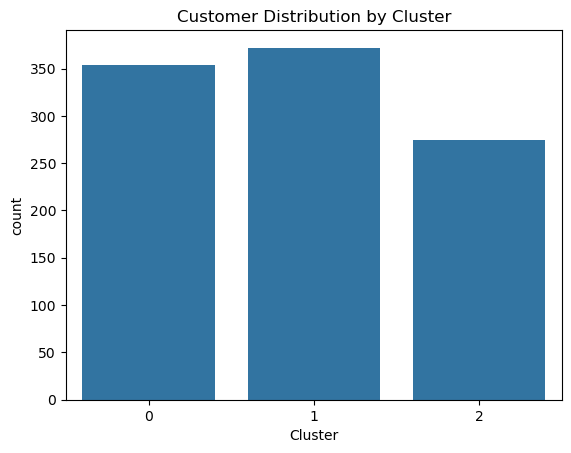

In [11]:
sns.countplot(x='Cluster', data=df)
plt.title("Customer Distribution by Cluster")
plt.show()
